<h1 style="color:#007fff">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>Project: </strong>Ecommerce&nbsp;&nbsp;&nbsp;&nbsp;----</h1>  


- **Exercise Instructions**

   * Attempt the exercise on your own first  
   * The dataset for this project is in the file `data_Ecommerce_Customers`.

- **Project Background**

   * You have contract work with a New York City–based e-commerce company.
   * The company _**sells clothing online**_ and also offers _**in-store style**_ and _**clothing advice sessions**_.
   * Customers can:

     * Visit the store for a personal stylist session.
     * Later place orders via the mobile app or website.
   * The business goal: Decide whether to focus on improving the **mobile app experience** or the **website experience**.
   * Your task: Use the dataset to help the company make this decision.

- **Dataset Notes**

   * The dataset is artificially generated.
   * Includes _fake credit card numbers and email addresses_ (no real sensitive data).

- **Project Steps**

   * Import necessary libraries and load the dataset.
   * Perform **exploratory data analysis (EDA)** using Seaborn to create visualizations and diagrams.
   * Answer questions to better understand customer patterns.
   * Split the data into **training** and **testing** sets.
   * Train a **linear regression model**.
   * Make predictions on the test data.
   * Evaluate model performance using metrics.
   * Analyze **residuals** to check model assumptions.
   * Write a **conclusion** based on the findings.


<h5 style="color:#1bbc9f">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>Libraries</strong>&nbsp;&nbsp;&nbsp;&nbsp;----</h5>  


In [2]:
# import libraries
import numpy as np
import pandas as pd

# We'll use following visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# To remove 'warnings' use 'filterwarnings'
import warnings
warnings.filterwarnings('ignore')

# shows figures in ipynb
%matplotlib inline


<h5 style="color:#1abcdf">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>Get the Data</strong>&nbsp;&nbsp;&nbsp;&nbsp;----</h5>  

* We will use the **data_Ecommerce_Customers** file (no `.csv` extension, but still loadable with `read_csv`).
* The dataset contains customer information such as **Email**, **Address**, and **Avatar color**.
* It also includes numerical columns:

  1. **Avg. Session Length** – Average duration of in-store style advice sessions (minutes).
  2. **Time on App** – Average time spent on the mobile app (minutes).
  3. **Time on Website** – Average time spent on the website (minutes).
  4. **Length of Membership** – Number of years as a member.

* Load the file into a DataFrame named **`customers`**.


In [3]:
# Read in the csv file and as a dataframe named customers.
customers = pd.read_csv("./data_Ecommerce_Customers")

<h5 style="color:#1bbc9f">----&nbsp;&nbsp;&nbsp;&nbsp;<strong>check info</strong>&nbsp;&nbsp;&nbsp;&nbsp;----</h5>  

* Check `head()` of customers, `info()` and `describe()`

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

<h3 style="color:#e52b52">--------&nbsp;&nbsp;&nbsp;&nbsp;<strong>EDA: Exploratory Data Analysis</strong>&nbsp;&nbsp;&nbsp;&nbsp;--------</h3>  

* We'll focus only on the numerical columns in the dataset.
* **Jointplot tasks:**

  1. Compare **Time on Website** vs. **Yearly Amount Spent** – check if the correlation is reasonable.
  2. Compare **Time on App** vs. **Yearly Amount Spent**.
  3. Create a **2D hex bin plot** for **Time on App** vs. **Length of Membership**.



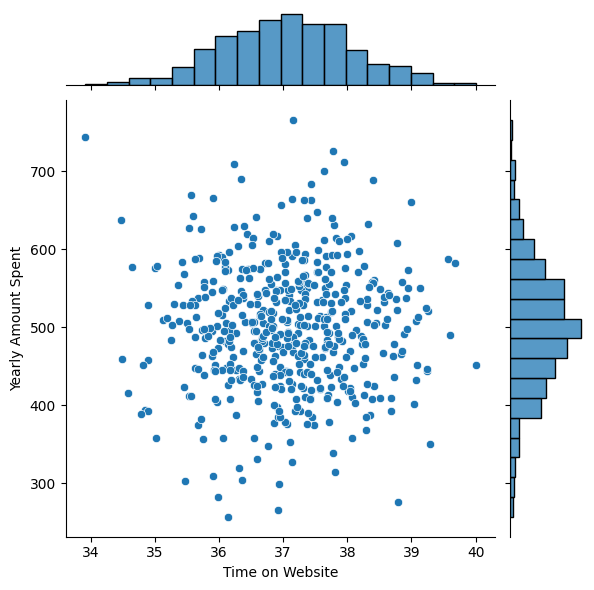

In [5]:
sns.jointplot(data= customers, x=customers['Time on Website'], y=customers['Yearly Amount Spent'])

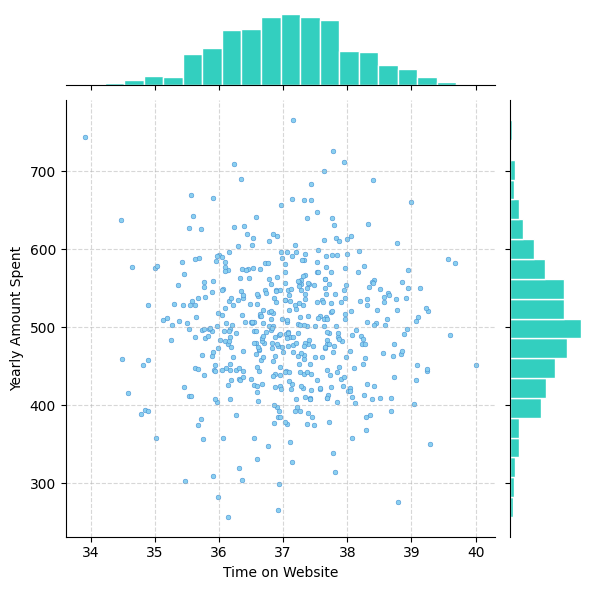

In [ ]:
# with more style

# More time on site, more money spent.
fig1 = sns.jointplot(
    data=customers,
    x="Time on Website",
    y="Yearly Amount Spent",
    kind="scatter",
    height=6,
    color="#89cff0",
    edgecolor="#2978c7",
    s=12,
    marginal_kws=dict(bins=20, fill=True, color="#00c4b0", edgecolor="white", alpha=0.8)
).set_axis_labels("Time on Website", "Yearly Amount Spent")

fig1.ax_joint.grid(True, linestyle="--", alpha=0.5)


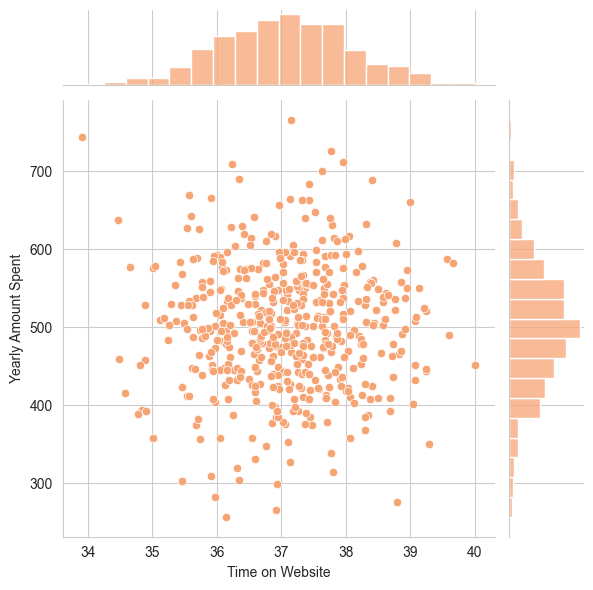

In [ ]:
# with sns plotstyle
sns.set_palette("OrRd_d")
sns.set_style('whitegrid')

sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=customers)

# more styles
# {'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG'}

# Suffix modifier
# sns.color_palette("OrRd")    # Original Orange–Red palette
# sns.color_palette("OrRd_r")  # Same palette, reversed
# sns.color_palette("OrRd_d")  # Same palette, but darker shades
# or combine them as _rd (dark + reversed).

<h5 style="color:#007fff">What does the correlation means?</h5>

Customers who spend more time on the site tend to spend more money.  
Most customers spend around 37 minutes on the site, with an average yearly spending of about $500.